In [1029]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1030]:
ebay = pd.read_excel('ebayAuctions.xlsx', sheet_name='eBay auctions')

In [1031]:
ebay.shape

(1972, 8)

In [1032]:
ebay.head(10)

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
5,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
6,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
7,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
8,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
9,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [1033]:
ebay.dtypes

Category         object
Currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [1034]:
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


From above, there are 1972 rows and 8 columns with no null values in the dataset.

In [1035]:
ebay.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


Looking at some relationships between competitive auctions and categorical data (category, currency, end day) using normalized crosstabs before they are converted to dummy variables.

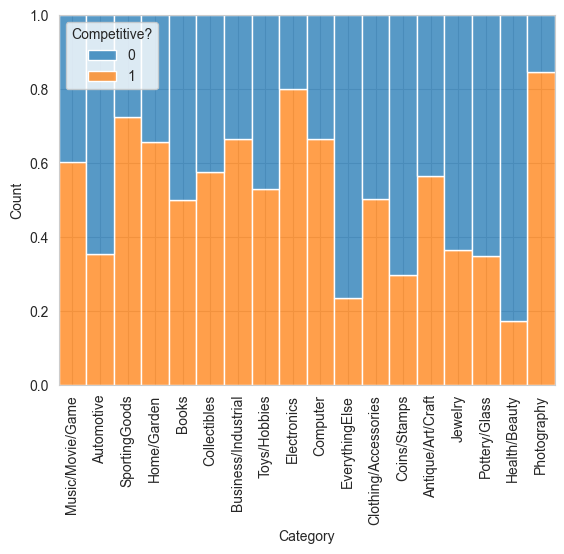

In [1036]:
crosstab = pd.crosstab(ebay["Competitive?"], ebay["Category"], margins=False)
crosstab_norm = (crosstab.div(crosstab.sum(axis=1), axis=0)) # normalized
#crosstab_norm.transpose().plot(kind = 'bar', stacked = True)
ax = sns.histplot(x="Category", hue="Competitive?", discrete=True, multiple="fill", data=ebay)
ax.tick_params(axis='x', rotation=90)

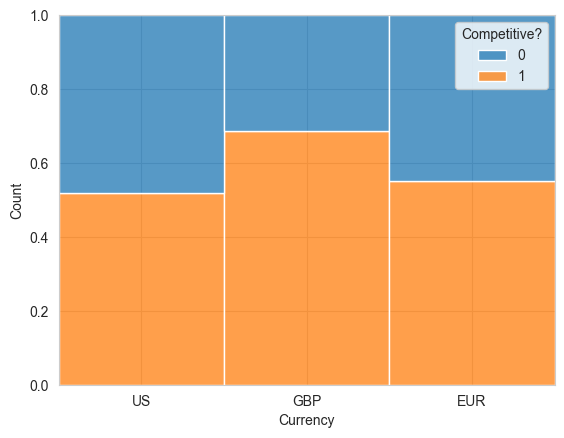

In [1037]:
crosstab = pd.crosstab(ebay["Competitive?"], ebay["Currency"], margins=False)
crosstab_norm = (crosstab.div(crosstab.sum(axis=1), axis=0)) # normalized
#crosstab_norm.transpose().plot(kind = 'bar', stacked = True)
ax = sns.histplot(x="Currency", hue="Competitive?", discrete=True, multiple="fill", data=ebay)

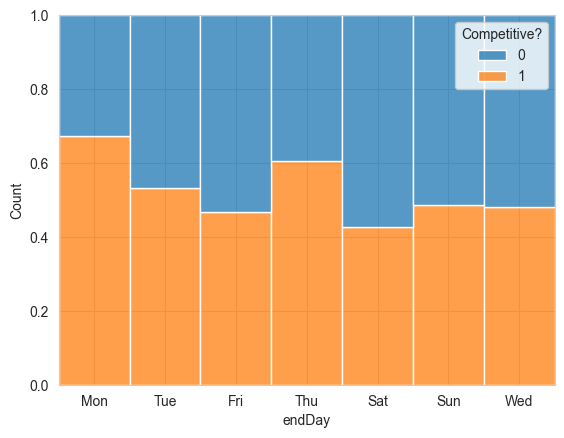

In [1038]:
crosstab = pd.crosstab(ebay["Competitive?"], ebay["endDay"], margins=False)
crosstab_norm = (crosstab.div(crosstab.sum(axis=1), axis=0)) # normalized
#crosstab_norm.transpose().plot(kind = 'bar', stacked = True)
ax = sns.histplot(x="endDay", hue="Competitive?", discrete=True, multiple="fill", data=ebay)

Next, have to handle categorical variables. First looking at Currency, using it to calculate both open and close prices for consistency. USD was used for all values since US is the most common currency in the data. September 29 exchange rates are currently used. Keeping the currency value as a dummy variable to evaluate potential relationships (though unlikely) and converting category and end day to dummy variables as well, using all k dummy variables so no single category is treated as the baseline.

In [1039]:
ebay['Currency'].value_counts()

exchange_rates = {
    "US": 1.0,
    "EUR": 1.17,
    "GBP": 1.34
}

ebay["ClosePriceUSD"] = ebay.apply(lambda row: row["ClosePrice"] * exchange_rates[row["Currency"]], axis=1)
ebay["OpenPriceUSD"] = ebay.apply(lambda row: row["OpenPrice"] * exchange_rates[row["Currency"]], axis=1)
ebay = ebay.drop(["ClosePrice", "OpenPrice"], axis=1)

In [1040]:
ebay = pd.get_dummies(ebay, columns=["Category", "Currency", "endDay"]).astype(float)

In [1041]:
ebay["Competitive?"].value_counts()

Competitive?
1.0    1066
0.0     906
Name: count, dtype: int64

In [1042]:
ebay["Competitive?"].value_counts(normalize=True)*100

Competitive?
1.0    54.056795
0.0    45.943205
Name: proportion, dtype: float64

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '0.0')])

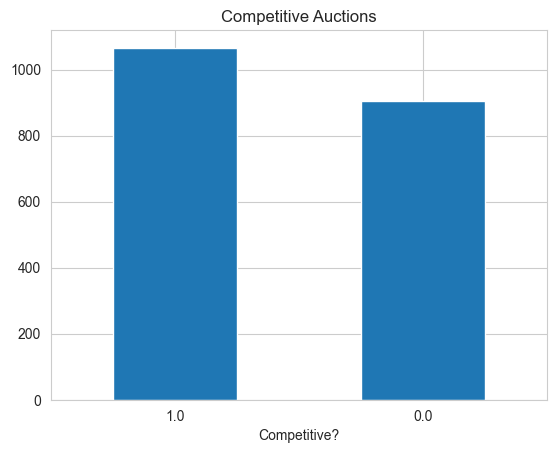

In [1043]:
ebay["Competitive?"].value_counts().plot(kind='bar', title='Competitive Auctions')
plt.xticks(rotation=360)

Taking the log of the open and close prices to address skewness in the data. Cannot do this for seller rating since it starts at 0.

In [1044]:
ebay["logClosePrice"] = np.log(ebay["ClosePriceUSD"])
ebay["logOpenPrice"] = np.log(ebay["OpenPriceUSD"])

In [1045]:
crosstab = pd.crosstab(ebay["Competitive?"], ebay["Duration"], margins=False)
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0) # normalized
crosstab_norm

Duration,1.0,3.0,5.0,7.0,10.0
Competitive?,,,,,
0.0,0.012141,0.129139,0.161148,0.545254,0.152318
1.0,0.011257,0.090056,0.300188,0.443715,0.154784


array([[<Axes: title={'center': 'sellerRating'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Competitive?'}>,
        <Axes: title={'center': 'ClosePriceUSD'}>,
        <Axes: title={'center': 'OpenPriceUSD'}>,
        <Axes: title={'center': 'Category_Antique/Art/Craft'}>],
       [<Axes: title={'center': 'Category_Automotive'}>,
        <Axes: title={'center': 'Category_Books'}>,
        <Axes: title={'center': 'Category_Business/Industrial'}>,
        <Axes: title={'center': 'Category_Clothing/Accessories'}>,
        <Axes: title={'center': 'Category_Coins/Stamps'}>,
        <Axes: title={'center': 'Category_Collectibles'}>],
       [<Axes: title={'center': 'Category_Computer'}>,
        <Axes: title={'center': 'Category_Electronics'}>,
        <Axes: title={'center': 'Category_EverythingElse'}>,
        <Axes: title={'center': 'Category_Health/Beauty'}>,
        <Axes: title={'center': 'Category_Home/Garden'}>,
        <Axes: title={'center': 'Ca

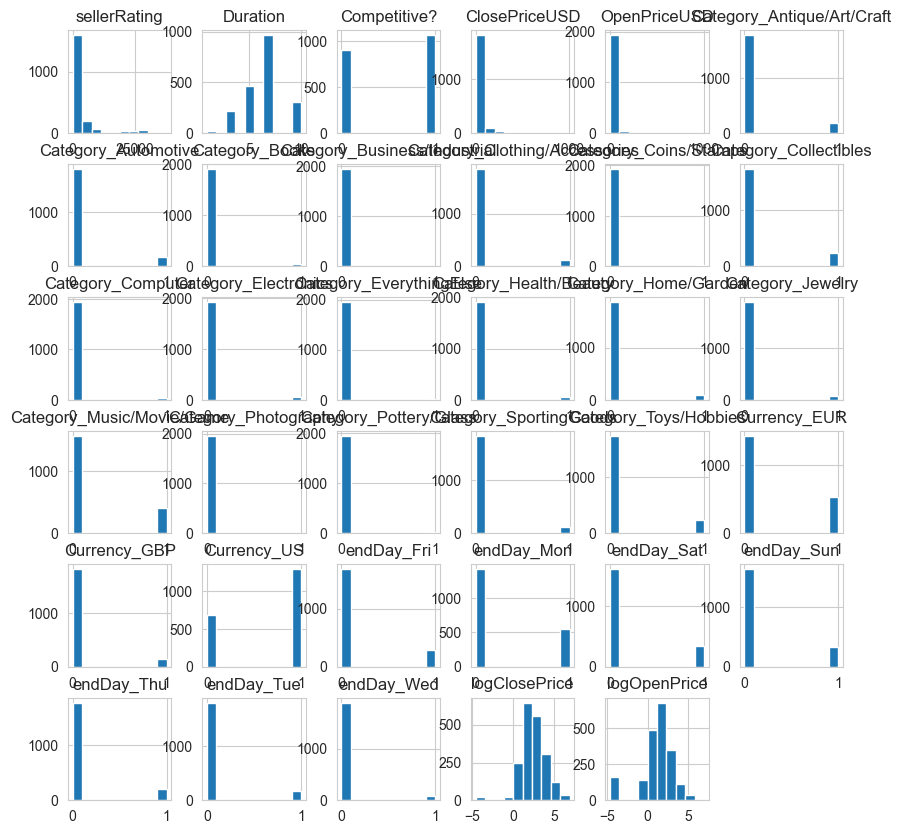

In [1046]:
ebay.hist(figsize=(10,10), sharex=False, sharey=False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Densit

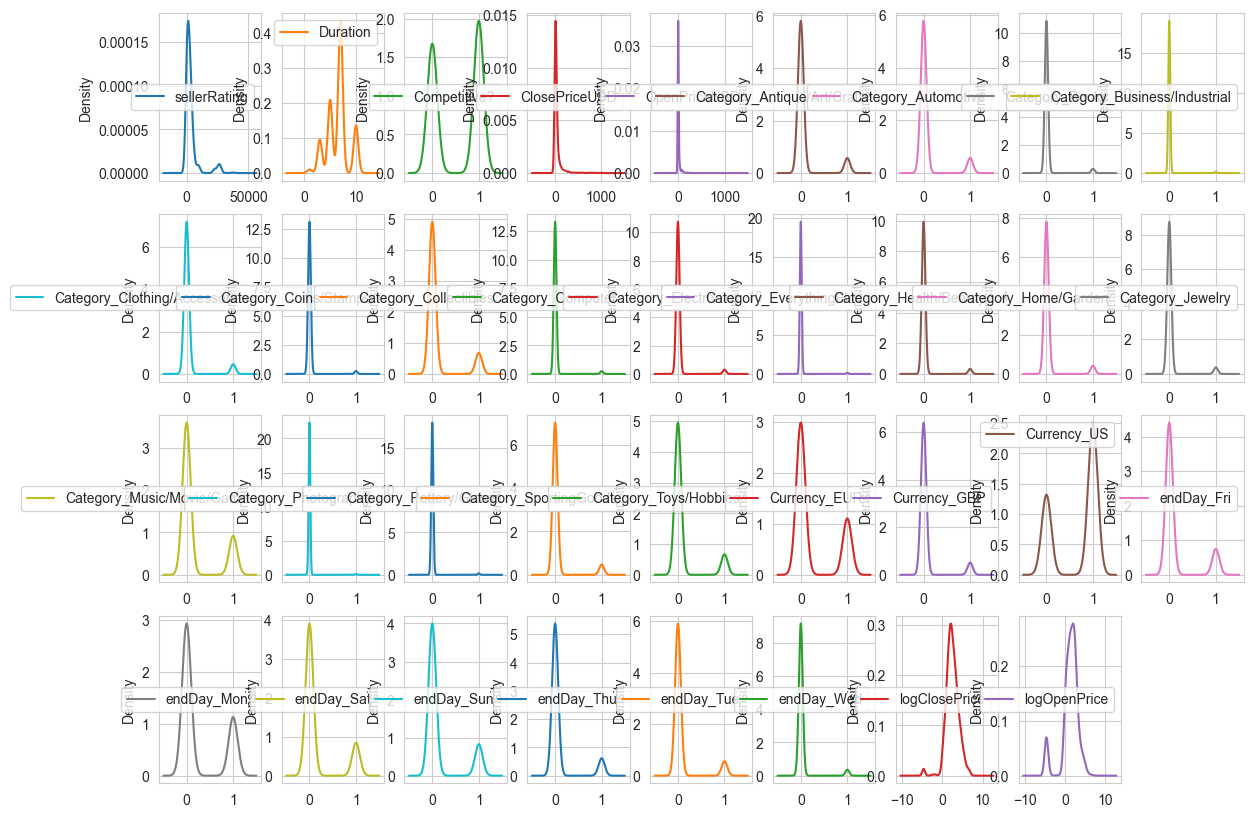

In [1047]:
ebay.plot(figsize=(14,10), kind='density', subplots=True, layout=(4,9), sharex=False)

sellerRating                        Axes(0.125,0.712609;0.0731132x0.167391)
Duration                         Axes(0.212736,0.712609;0.0731132x0.167391)
Competitive?                     Axes(0.300472,0.712609;0.0731132x0.167391)
ClosePriceUSD                    Axes(0.388208,0.712609;0.0731132x0.167391)
OpenPriceUSD                     Axes(0.475943,0.712609;0.0731132x0.167391)
Category_Antique/Art/Craft       Axes(0.563679,0.712609;0.0731132x0.167391)
Category_Automotive              Axes(0.651415,0.712609;0.0731132x0.167391)
Category_Books                   Axes(0.739151,0.712609;0.0731132x0.167391)
Category_Business/Industrial     Axes(0.826887,0.712609;0.0731132x0.167391)
Category_Clothing/Accessories       Axes(0.125,0.511739;0.0731132x0.167391)
Category_Coins/Stamps            Axes(0.212736,0.511739;0.0731132x0.167391)
Category_Collectibles            Axes(0.300472,0.511739;0.0731132x0.167391)
Category_Computer                Axes(0.388208,0.511739;0.0731132x0.167391)
Category_Ele

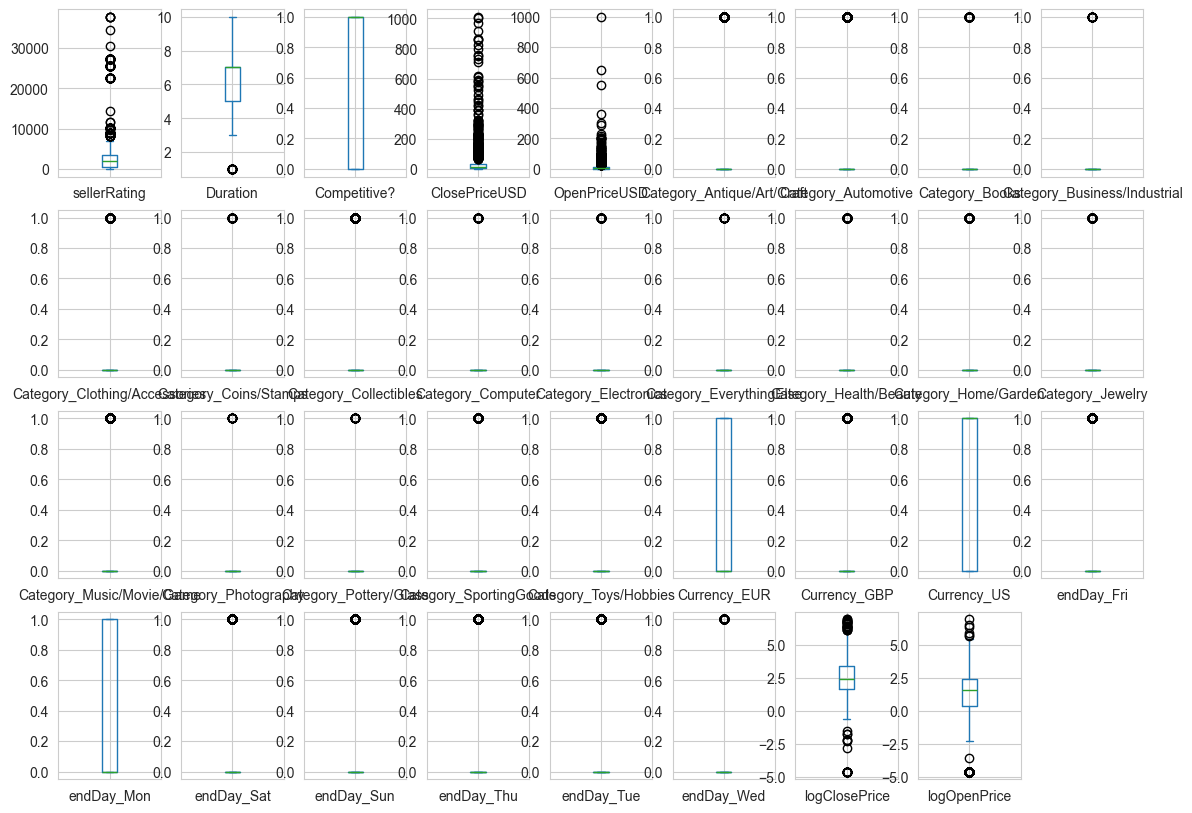

In [1048]:
ebay.plot(figsize=(14,10), kind='box', subplots=True, layout=(4, 9), sharex=False, sharey=False)

<Axes: xlabel='Competitive?', ylabel='logClosePrice'>

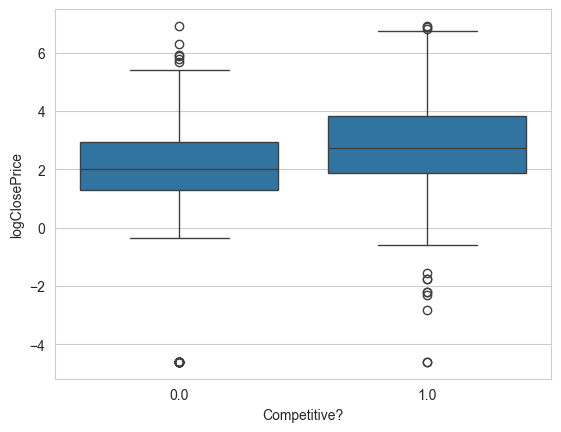

In [1049]:
sns.boxplot(x=ebay["Competitive?"], y=ebay["logClosePrice"])

<Axes: xlabel='Competitive?', ylabel='logOpenPrice'>

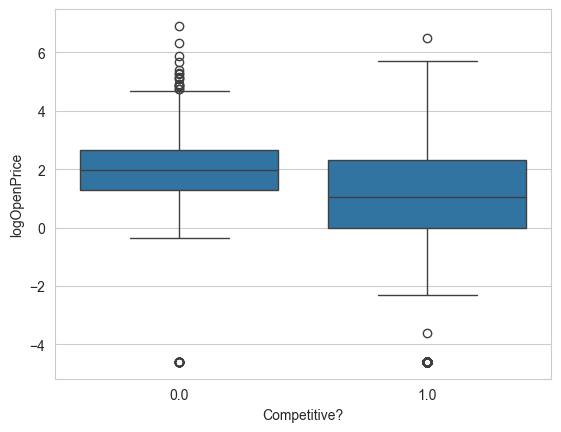

In [1050]:
sns.boxplot(x=ebay["Competitive?"], y=ebay["logOpenPrice"])

In [1051]:
correlations = ebay.corr(numeric_only = True)
correlations

,sellerRating,Duration,Competitive?,ClosePriceUSD,OpenPriceUSD,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,...,Currency_US,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,logClosePrice,logOpenPrice
sellerRating,1.000000,-0.149734,-0.033956,-0.009846,-0.044870,-0.046931,-0.036651,-0.063678,-0.017987,-0.104765,...,0.256197,0.029730,0.263291,-0.061241,-0.080416,-0.133174,-0.078274,-0.064249,0.041238,-0.022375
Duration,-0.149734,1.000000,-0.026478,-0.079245,-0.079218,0.074273,-0.224663,0.081360,-0.020144,0.122571,...,-0.487755,-0.117408,-0.106726,-0.094756,-0.010734,0.082924,0.186871,0.270655,-0.101610,0.075761
Competitive?,-0.033956,-0.026478,1.000000,0.182515,-0.095835,0.015377,-0.117966,-0.013659,0.024286,-0.018493,...,-0.058688,-0.061008,0.165297,-0.105716,-0.050524,0.042973,-0.005196,-0.024166,0.269829,-0.304917
ClosePriceUSD,-0.009846,-0.079245,0.182515,1.000000,0.461887,-0.082650,0.194554,-0.013171,0.005501,0.005191,...,0.022550,0.012208,0.006988,0.013833,0.025113,-0.044225,-0.028893,-0.003401,0.601861,0.125720
OpenPriceUSD,-0.044870,-0.079218,-0.095835,0.461887,1.000000,-0.055018,0.342203,-0.021343,0.003420,-0.028673,...,0.122228,0.057506,-0.079059,0.045883,0.052929,-0.052935,-0.001242,-0.031161,0.346996,0.409719
Category_Antique/Art/Craft,-0.046931,0.074273,0.015377,-0.082650,-0.055018,1.000000,-0.098913,-0.052690,-0.030139,-0.079577,...,0.134499,0.106856,0.030944,-0.081188,-0.006298,-0.094381,0.073455,-0.053163,-0.088130,0.027515
Category_Automotive,-0.036651,-0.224663,-0.117966,0.194554,0.342203,-0.098913,1.000000,-0.052853,-0.030232,-0.079824,...,0.142888,0.115891,-0.104545,-0.003158,0.053958,-0.071395,0.060147,-0.044129,0.194832,0.238180
Category_Books,-0.063678,0.081360,-0.013659,-0.013171,-0.021343,-0.052690,-0.052853,1.000000,-0.016104,-0.042521,...,-0.067853,-0.034003,-0.034725,-0.029338,0.022628,0.025297,0.036630,0.064107,-0.059624,0.003790
Category_Business/Industrial,-0.017987,-0.020144,0.024286,0.005501,0.003420,-0.030139,-0.030232,-0.016104,1.000000,-0.024323,...,-0.020115,-0.009370,-0.035734,-0.016782,0.083688,-0.014839,-0.010627,0.008793,0.012060,0.003298
Category_Clothing/Accessories,-0.104765,0.122571,-0.018493,0.005191,-0.028673,-0.079577,-0.079824,-0.042521,-0.024323,1.000000,...,-0.300028,-0.050237,-0.071636,-0.034412,-0.036146,0.089969,0.095961,0.116614,0.112498,0.062193


From this, most correlated with whether the auction was competitive are log of the open price (-0.304917), log of the close price (0.269829), end day mon (0.165297), category health/beauty (-0.135497), category automotive (-0.117966), endDay Saturday (-0.105716), and category sporting goods (0.086284).

[Text(0, 0, 'sellerRating'),
 Text(0, 1, 'Duration'),
 Text(0, 2, 'Competitive?'),
 Text(0, 3, 'ClosePriceUSD'),
 Text(0, 4, 'OpenPriceUSD'),
 Text(0, 5, 'Category_Antique/Art/Craft'),
 Text(0, 6, 'Category_Automotive'),
 Text(0, 7, 'Category_Books'),
 Text(0, 8, 'Category_Business/Industrial'),
 Text(0, 9, 'Category_Clothing/Accessories'),
 Text(0, 10, 'Category_Coins/Stamps'),
 Text(0, 11, 'Category_Collectibles'),
 Text(0, 12, 'Category_Computer'),
 Text(0, 13, 'Category_Electronics'),
 Text(0, 14, 'Category_EverythingElse'),
 Text(0, 15, 'Category_Health/Beauty'),
 Text(0, 16, 'Category_Home/Garden'),
 Text(0, 17, 'Category_Jewelry'),
 Text(0, 18, 'Category_Music/Movie/Game'),
 Text(0, 19, 'Category_Photography'),
 Text(0, 20, 'Category_Pottery/Glass'),
 Text(0, 21, 'Category_SportingGoods'),
 Text(0, 22, 'Category_Toys/Hobbies'),
 Text(0, 23, 'Currency_EUR'),
 Text(0, 24, 'Currency_GBP'),
 Text(0, 25, 'Currency_US'),
 Text(0, 26, 'endDay_Fri'),
 Text(0, 27, 'endDay_Mon'),
 Text(0,

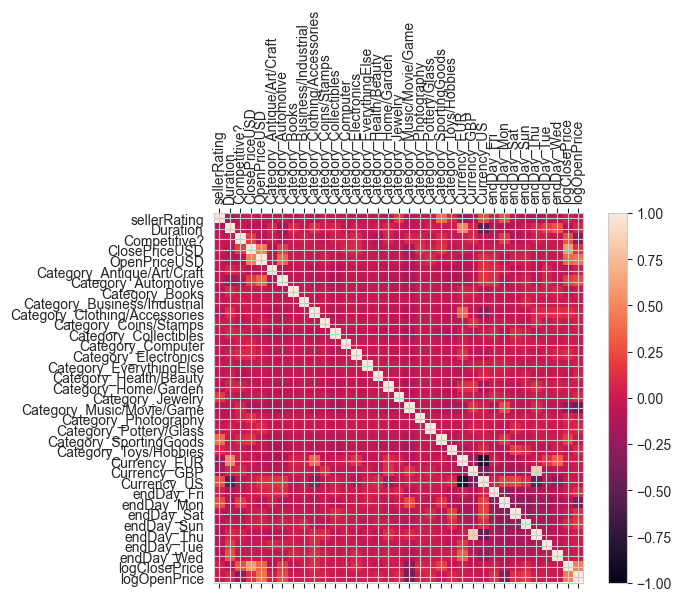

In [1053]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# change the tick labels
ticks = range(0,35,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels=ebay.head(0), rotation=90)
ax.set_yticklabels(labels=ebay.head(0))

Using Z-score normalization for all numeric variables (at this point, that's all the data).

In [1054]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ebay.select_dtypes(include="number").columns.drop("Competitive?")
scaled_values = pd.DataFrame(scaler.fit_transform(ebay[scaled_cols]), columns=scaled_cols, index=ebay.index)

ebay_scaled = ebay.copy()
ebay_scaled[scaled_cols] = scaled_values

In [1057]:
correlations = ebay_scaled.corr(numeric_only = True)
correlations

logOpenPrice             -0.304917
Category_Health/Beauty   -0.135497
Category_Automotive      -0.117966
endDay_Sat               -0.105716
OpenPriceUSD             -0.095835
Category_Jewelry         -0.073025
Name: Competitive?, dtype: float64


[Text(0, 0, 'sellerRating'),
 Text(0, 1, 'Duration'),
 Text(0, 2, 'Competitive?'),
 Text(0, 3, 'ClosePriceUSD'),
 Text(0, 4, 'OpenPriceUSD'),
 Text(0, 5, 'Category_Antique/Art/Craft'),
 Text(0, 6, 'Category_Automotive'),
 Text(0, 7, 'Category_Books'),
 Text(0, 8, 'Category_Business/Industrial'),
 Text(0, 9, 'Category_Clothing/Accessories'),
 Text(0, 10, 'Category_Coins/Stamps'),
 Text(0, 11, 'Category_Collectibles'),
 Text(0, 12, 'Category_Computer'),
 Text(0, 13, 'Category_Electronics'),
 Text(0, 14, 'Category_EverythingElse'),
 Text(0, 15, 'Category_Health/Beauty'),
 Text(0, 16, 'Category_Home/Garden'),
 Text(0, 17, 'Category_Jewelry'),
 Text(0, 18, 'Category_Music/Movie/Game'),
 Text(0, 19, 'Category_Photography'),
 Text(0, 20, 'Category_Pottery/Glass'),
 Text(0, 21, 'Category_SportingGoods'),
 Text(0, 22, 'Category_Toys/Hobbies'),
 Text(0, 23, 'Currency_EUR'),
 Text(0, 24, 'Currency_GBP'),
 Text(0, 25, 'Currency_US'),
 Text(0, 26, 'endDay_Fri'),
 Text(0, 27, 'endDay_Mon'),
 Text(0,

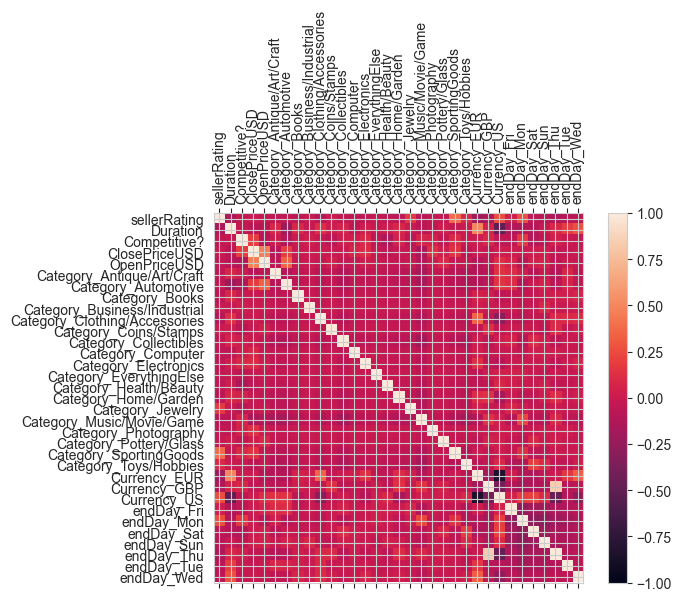

In [878]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# change the tick labels
ticks = range(0,33,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels=ebay.head(0), rotation=90)
ax.set_yticklabels(labels=ebay.head(0))